In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the CSV file
csv_file_path = './forklift_data/all.bagdata2.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

         Date             Time  MSec from start Mission  Emergency Stop  \
0  2024-04-25  11:01:28.655306         0.000000    Idle           False   
1  2024-04-25  11:01:28.855250       199.944258    Idle           False   
2  2024-04-25  11:01:29.055285       399.979830    Idle           False   
3  2024-04-25  11:01:29.255285       599.979401    Idle           False   
4  2024-04-25  11:01:29.455285       799.978971    Idle           False   

  Operating Mode  Dead mans switch  Machine Hours     GPSLat    GPSLong  ...  \
0     autonomous              True     251.587067  47.977063  16.510677  ...   
1     autonomous              True     251.587128  47.977063  16.510677  ...   
2     autonomous              True     251.587189  47.977063  16.510677  ...   
3     autonomous              True     251.587250  47.977063  16.510677  ...   
4     autonomous              True     251.587280  47.977063  16.510677  ...   

   planned_object_id_4  data_error  param_error  is_connected  c_dri

In [3]:
# Get the unique values in the "Mission" column
unique_missions = df['Mission'].unique()

# Print the unique values
print(unique_missions)

['Idle' 'GoToPallet' 'LoadPallet' 'GoToSlot' 'UnloadPallet' 'ReturnHome'
 'Success']


In [4]:
df.columns

Index(['Date', 'Time', 'MSec from start', 'Mission', 'Emergency Stop',
       'Operating Mode', 'Dead mans switch', 'Machine Hours', 'GPSLat',
       'GPSLong', 'GPSOrientation', 'Speed', 'x_map', 'y_map', 'object_id_1',
       'state_object_1', 'x_object_1', 'y_object_1', 'loaded_slot_id_1',
       'object_id_2', 'state_object_2', 'x_object_2', 'y_object_2',
       'loaded_slot_id_2', 'object_id_3', 'state_object_3', 'x_object_3',
       'y_object_3', 'loaded_slot_id_3', 'object_id_4', 'state_object_4',
       'x_object_4', 'y_object_4', 'loaded_slot_id_4', 'object_id_5',
       'state_object_5', 'x_object_5', 'y_object_5', 'loaded_slot_id_5',
       'slot_id_1', 'state_slot_1', 'x_slot_1', 'y_slot_1',
       'planned_object_id_1', 'slot_id_2', 'state_slot_2', 'x_slot_2',
       'y_slot_2', 'planned_object_id_2', 'slot_id_3', 'state_slot_3',
       'x_slot_3', 'y_slot_3', 'planned_object_id_3', 'slot_id_4',
       'state_slot_4', 'x_slot_4', 'y_slot_4', 'planned_object_id_4',
       '

In [5]:
# Filter the DataFrame to only include rows where 'Mission' is 'LoadPallet'
filtered_df_load = df.loc[df['Mission'] == 'LoadPallet']
filtered_df_unload = df.loc[df['Mission'] == 'UnloadPallet']
filtered_df_gotopallet = df.loc[df['Mission'] == 'GoToPallet']

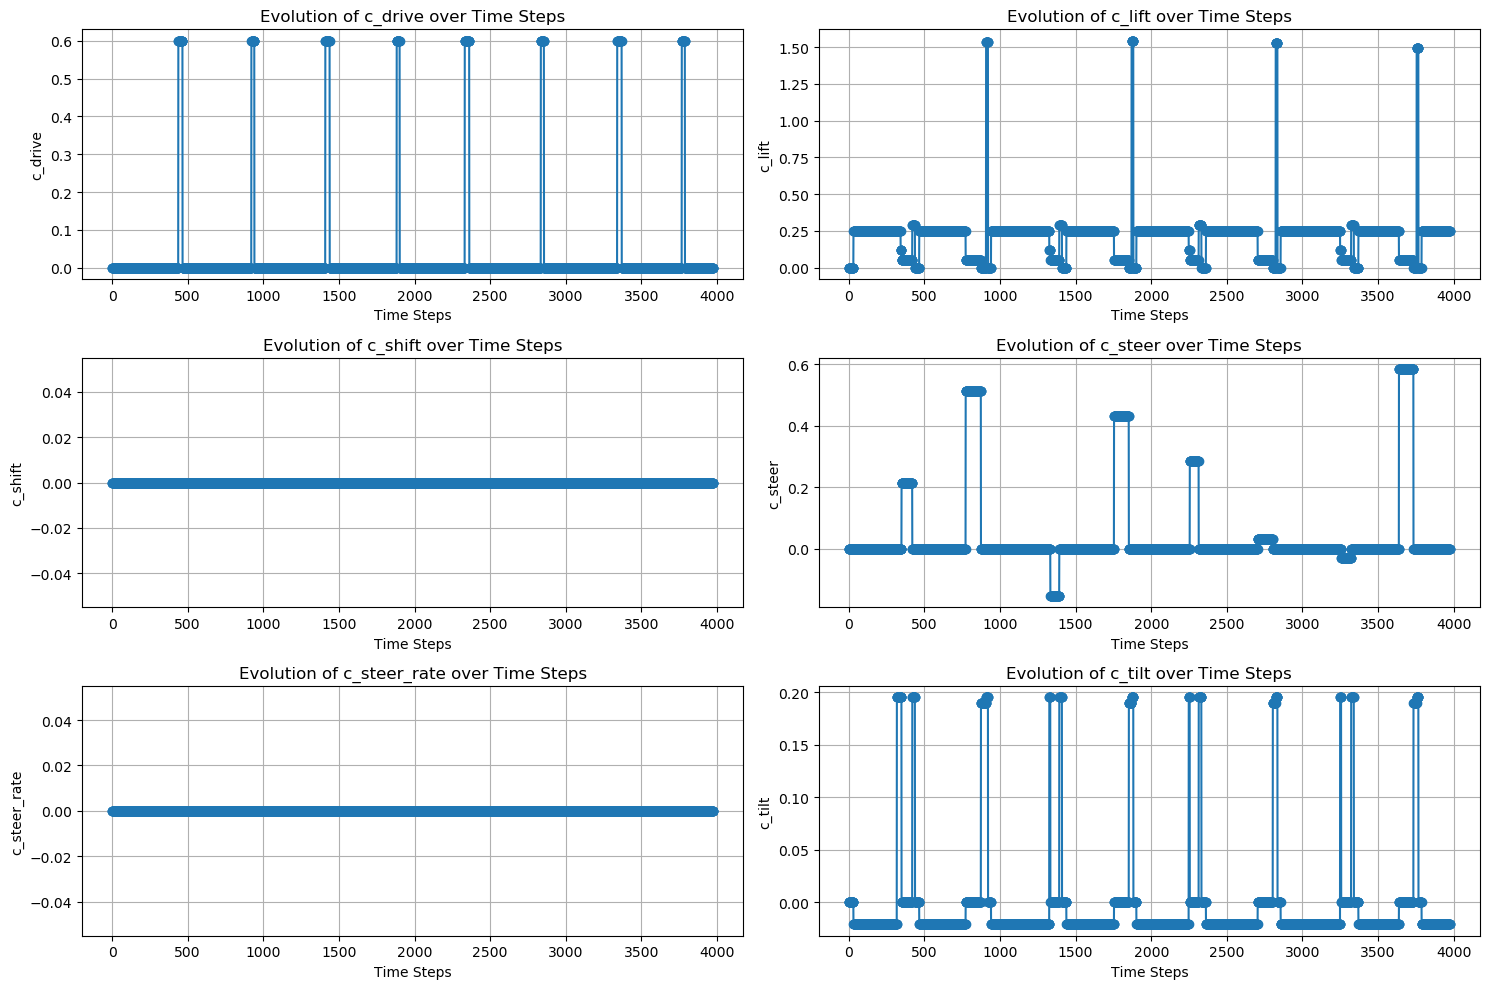

In [6]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot each column in its respective subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df.index, df[column], marker='o', linestyle='-')
    axes[i].set_title(f'Evolution of {column} over Time Steps')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

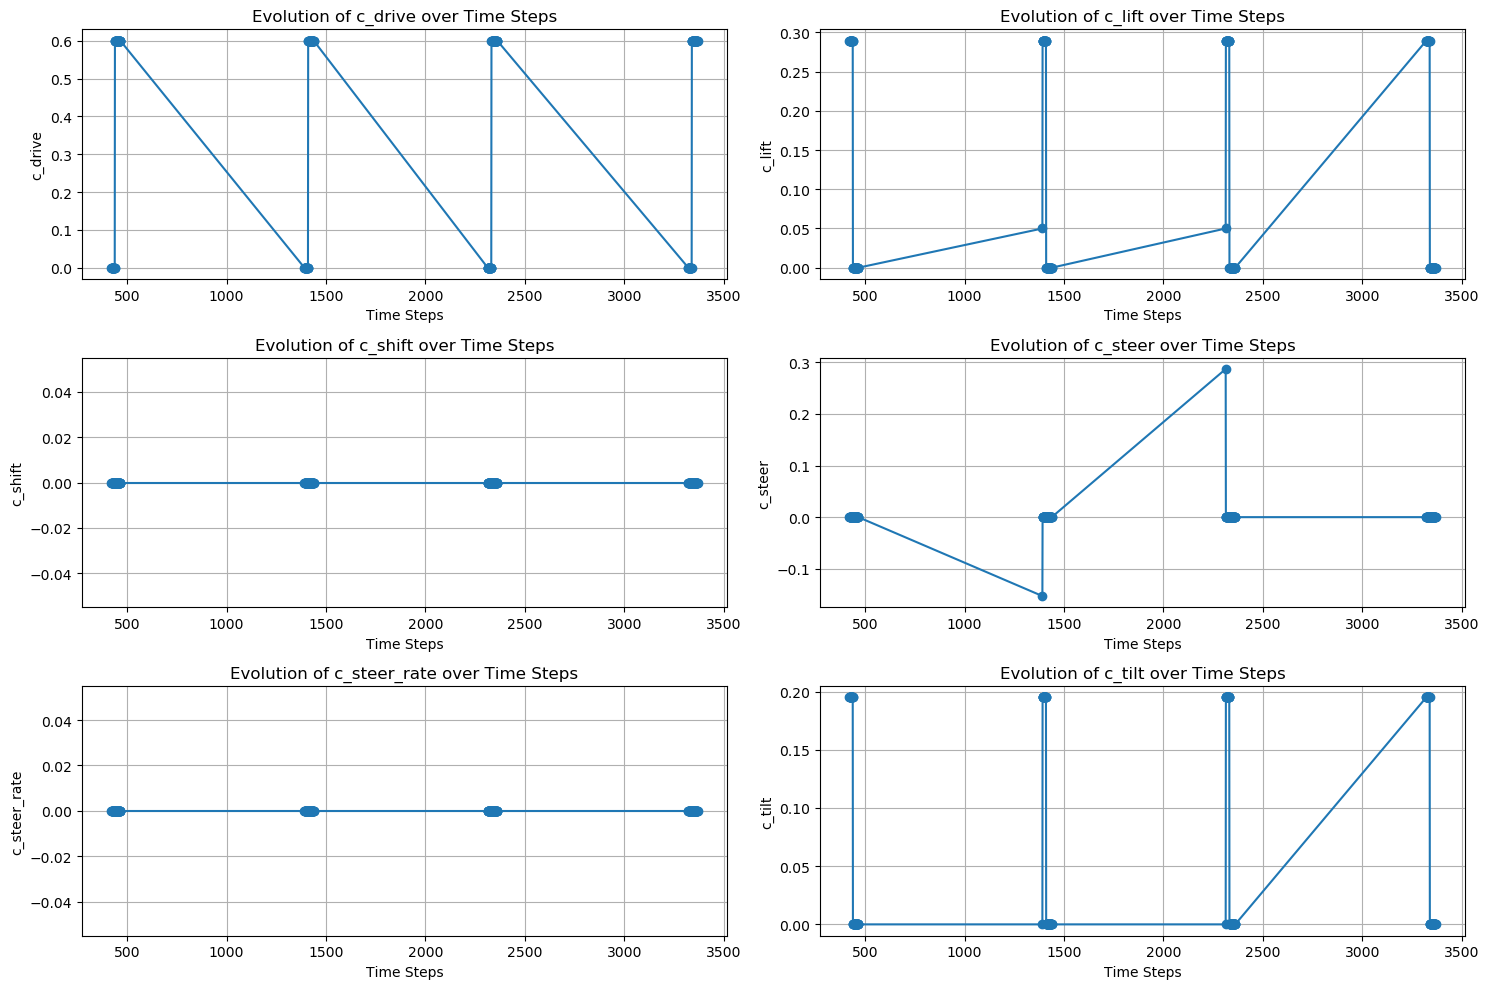

In [7]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot each column in its respective subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(filtered_df_load.index, filtered_df_load[column], marker='o', linestyle='-')
    axes[i].set_title(f'Evolution of {column} over Time Steps')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

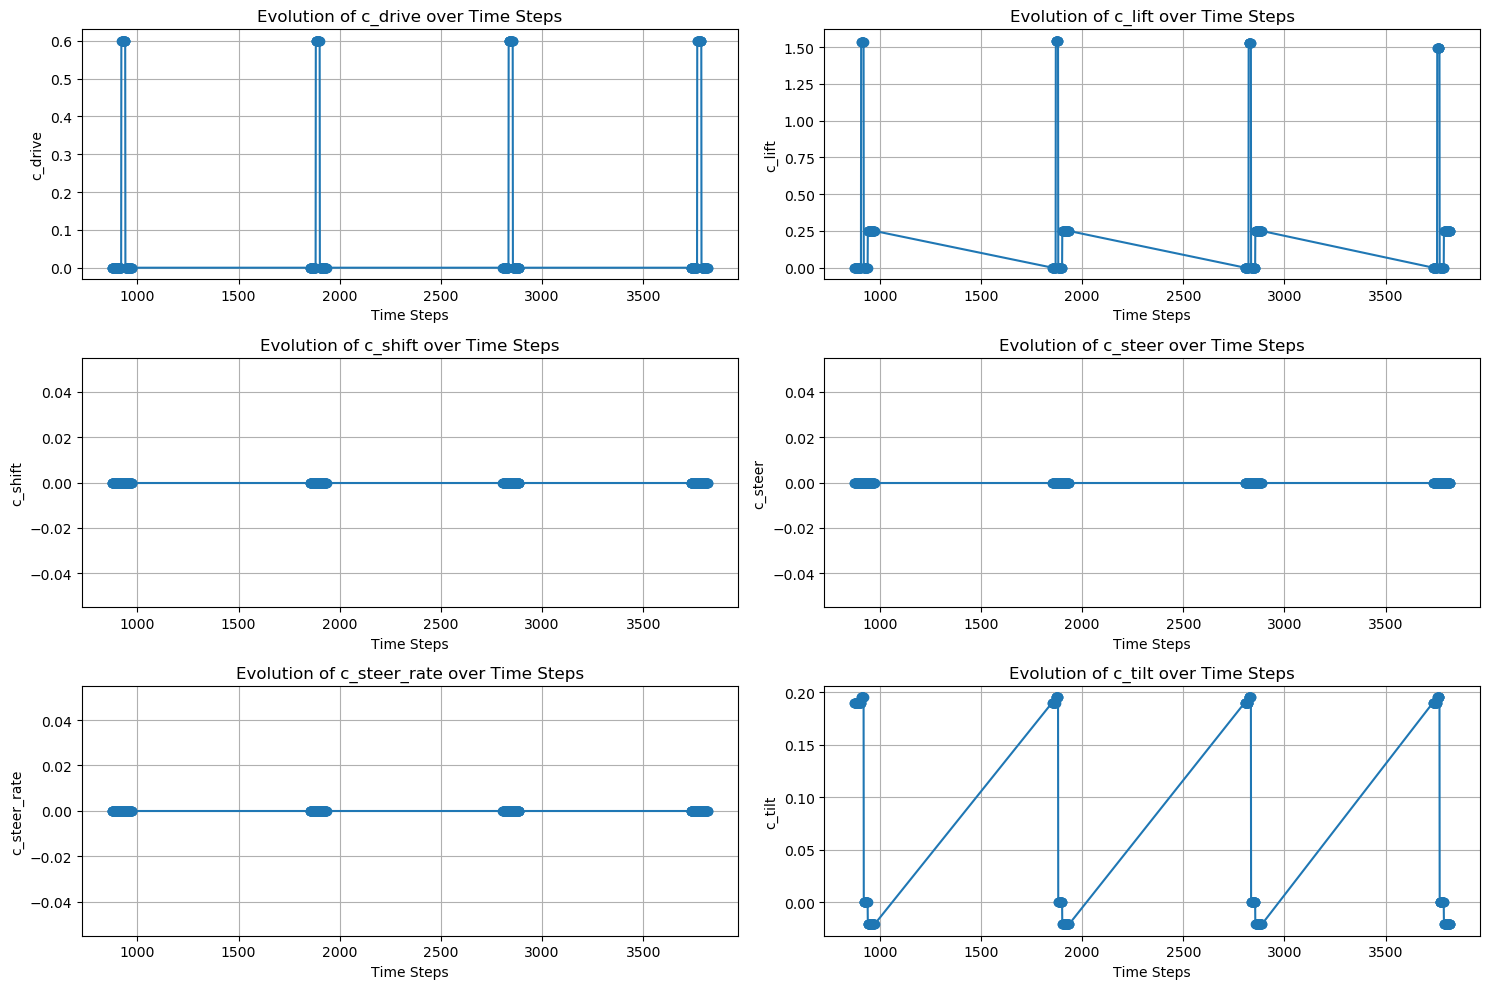

In [8]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot each column in its respective subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(filtered_df_unload.index, filtered_df_unload[column], marker='o', linestyle='-')
    axes[i].set_title(f'Evolution of {column} over Time Steps')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Identify the sequences of 'LoadPallet'
sequences = []
current_sequence = []

for i in range(len(filtered_df_load)):
    if i == 0 or filtered_df_load.index[i] == filtered_df_load.index[i-1] + 1:
        current_sequence.append(filtered_df_load.index[i])
    else:
        sequences.append(current_sequence)
        current_sequence = [filtered_df_load.index[i]]

if current_sequence:
    sequences.append(current_sequence)

# Split the DataFrame into multiple DataFrames
split_dfs_load = [filtered_df_load.loc[seq] for seq in sequences]

# Same for Unload
sequences = []
current_sequence = []

for i in range(len(filtered_df_unload)):
    if i == 0 or filtered_df_unload.index[i] == filtered_df_unload.index[i-1] + 1:
        current_sequence.append(filtered_df_unload.index[i])
    else:
        sequences.append(current_sequence)
        current_sequence = [filtered_df_unload.index[i]]

if current_sequence:
    sequences.append(current_sequence)

# Split the DataFrame into multiple DataFrames
split_dfs_unload = [filtered_df_unload.loc[seq] for seq in sequences]

# Same for gotopallet
sequences = []
current_sequence = []

for i in range(len(filtered_df_gotopallet)):
    if i == 0 or filtered_df_gotopallet.index[i] == filtered_df_gotopallet.index[i-1] + 1:
        current_sequence.append(filtered_df_gotopallet.index[i])
    else:
        sequences.append(current_sequence)
        current_sequence = [filtered_df_gotopallet.index[i]]

if current_sequence:
    sequences.append(current_sequence)

# Split the DataFrame into multiple DataFrames
split_dfs_gotopallet = [filtered_df_gotopallet.loc[seq] for seq in sequences]

# Print the number of sequences and the first few rows of each sequence
print(f"Number of LOAD sequences: {len(split_dfs_load)}")
# Print the number of sequences and the first few rows of each sequence
print(f"Number of UNLOAD sequences: {len(split_dfs_unload)}")
# Print the number of sequences and the first few rows of each sequence
print(f"Number of GOTOPALLET sequences: {len(split_dfs_gotopallet)}")

Number of LOAD sequences: 4
Number of UNLOAD sequences: 4
Number of GOTOPALLET sequences: 4



Printing info of trajectory LoadPallet  0


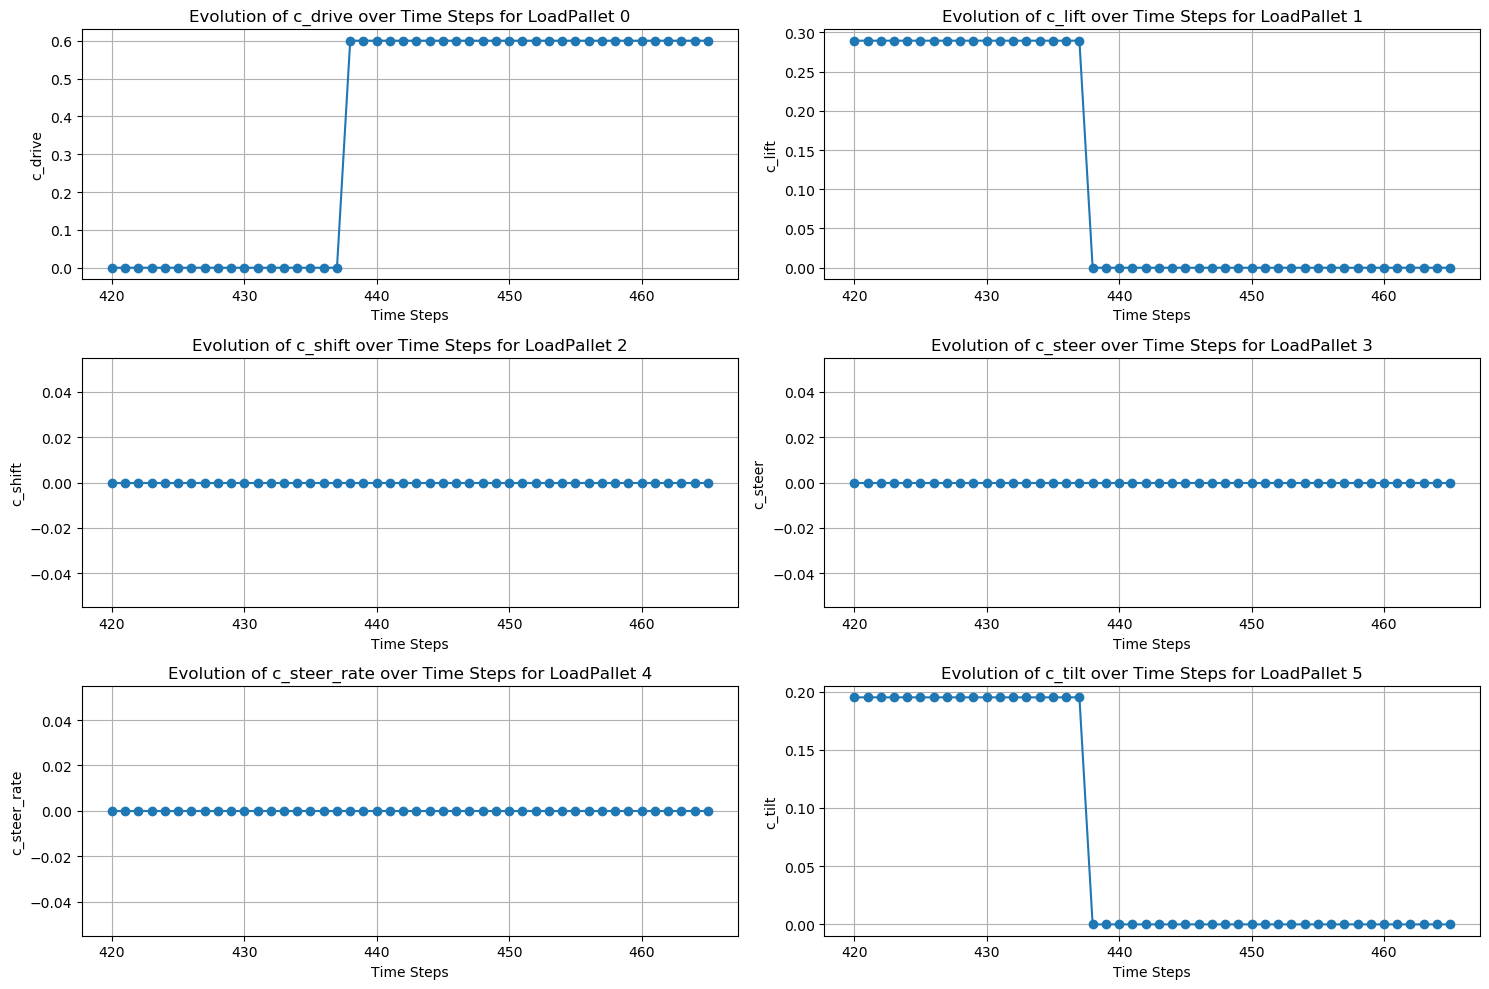


Printing info of trajectory LoadPallet  1


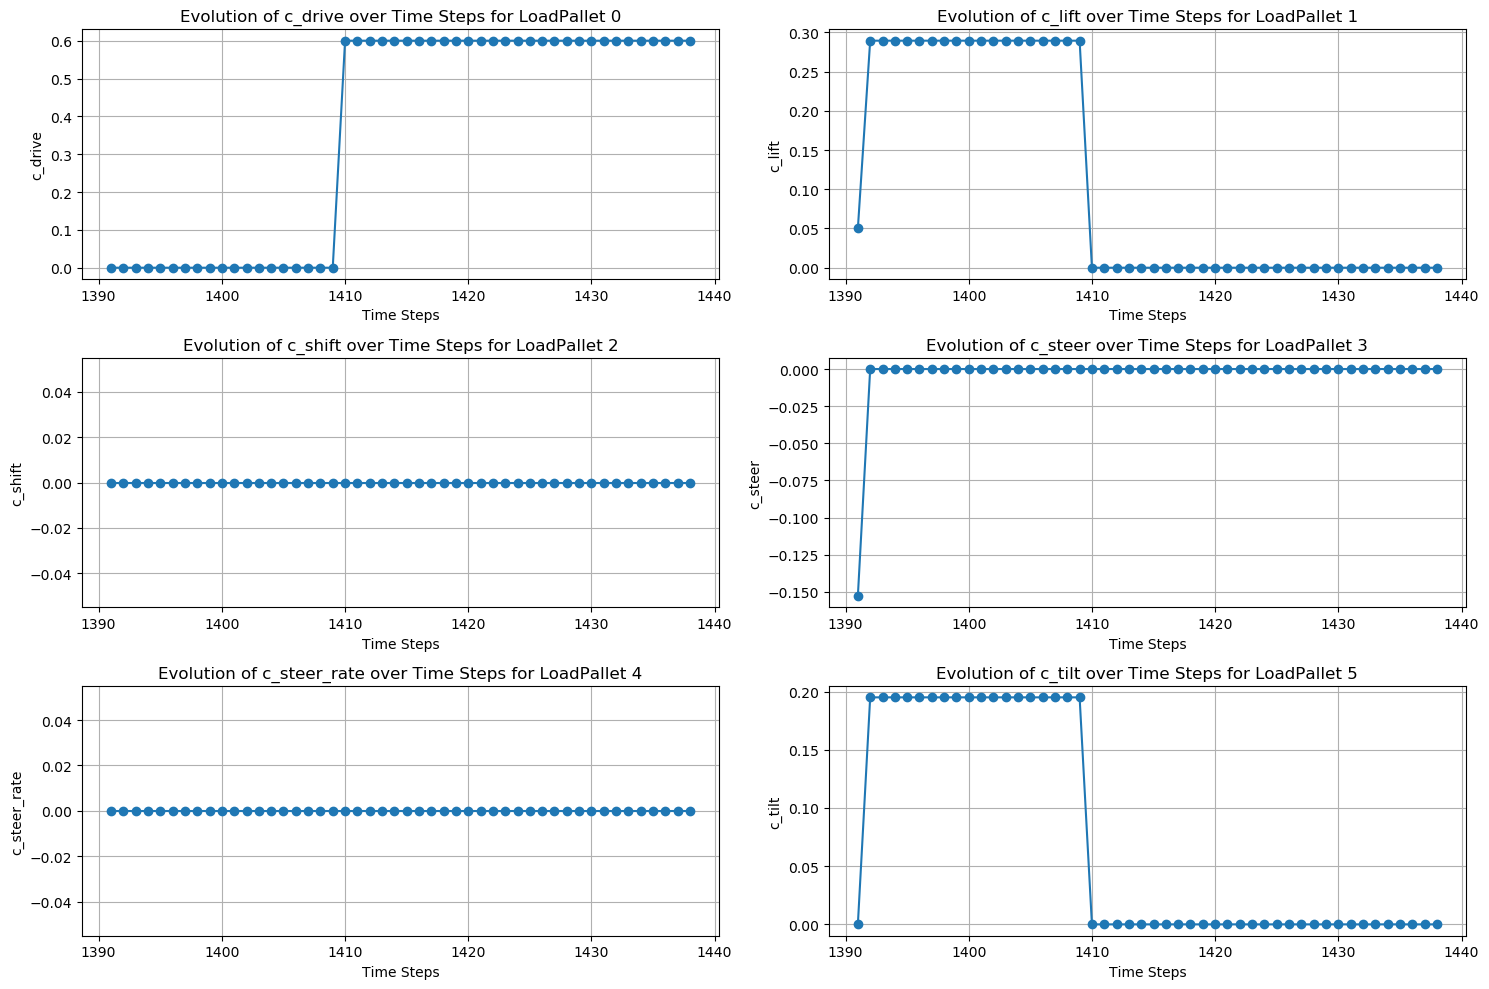


Printing info of trajectory LoadPallet  2


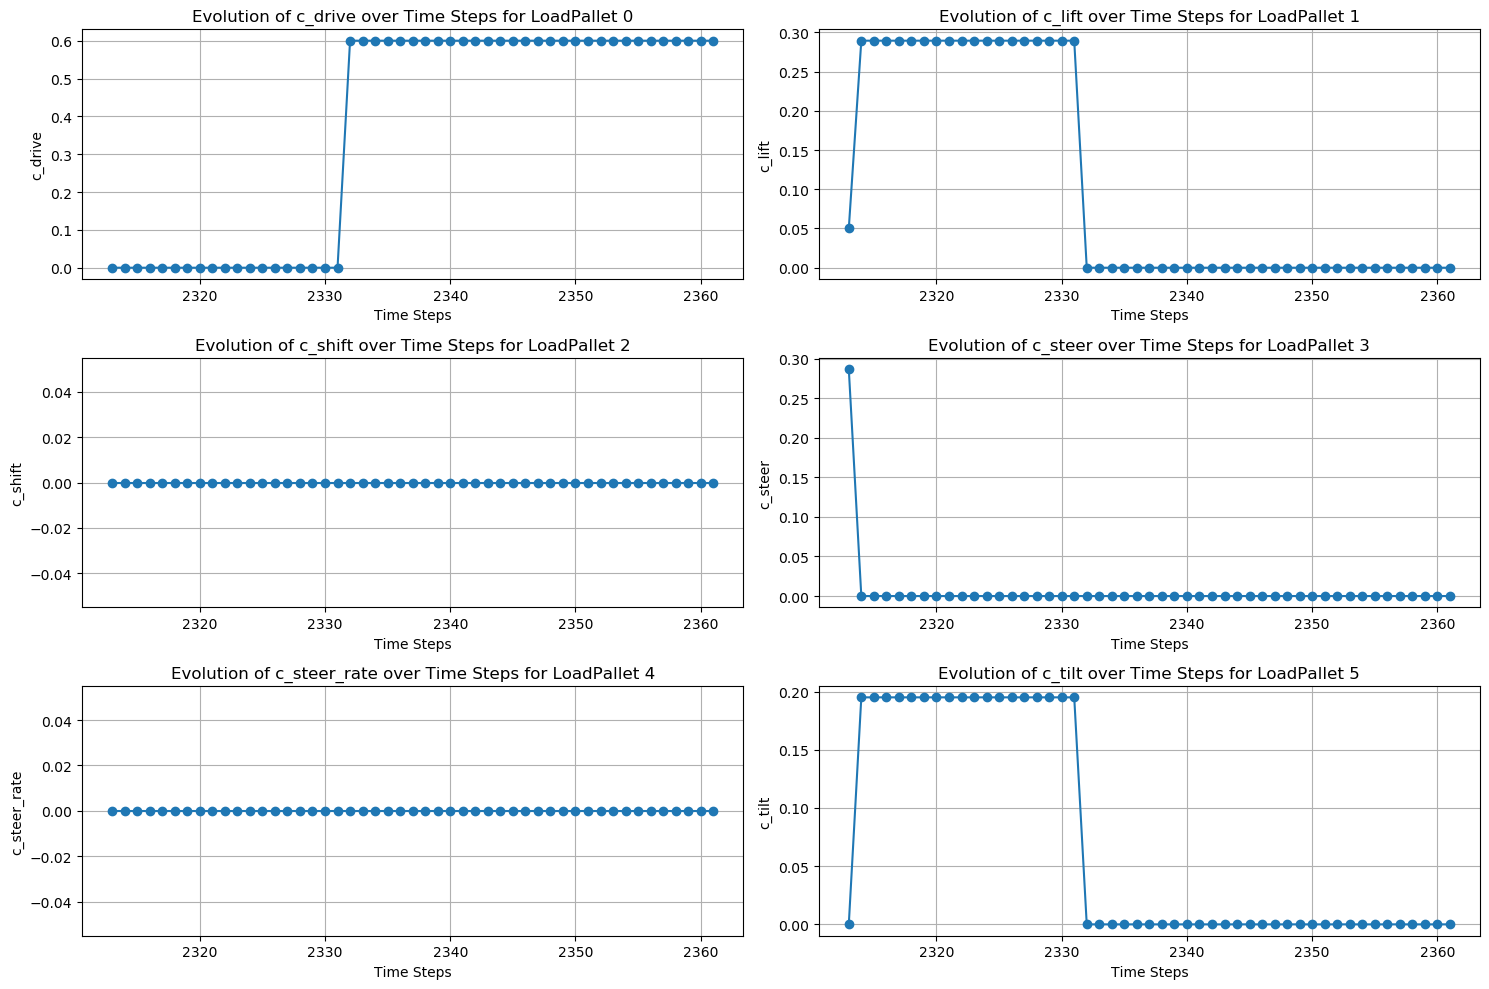


Printing info of trajectory LoadPallet  3


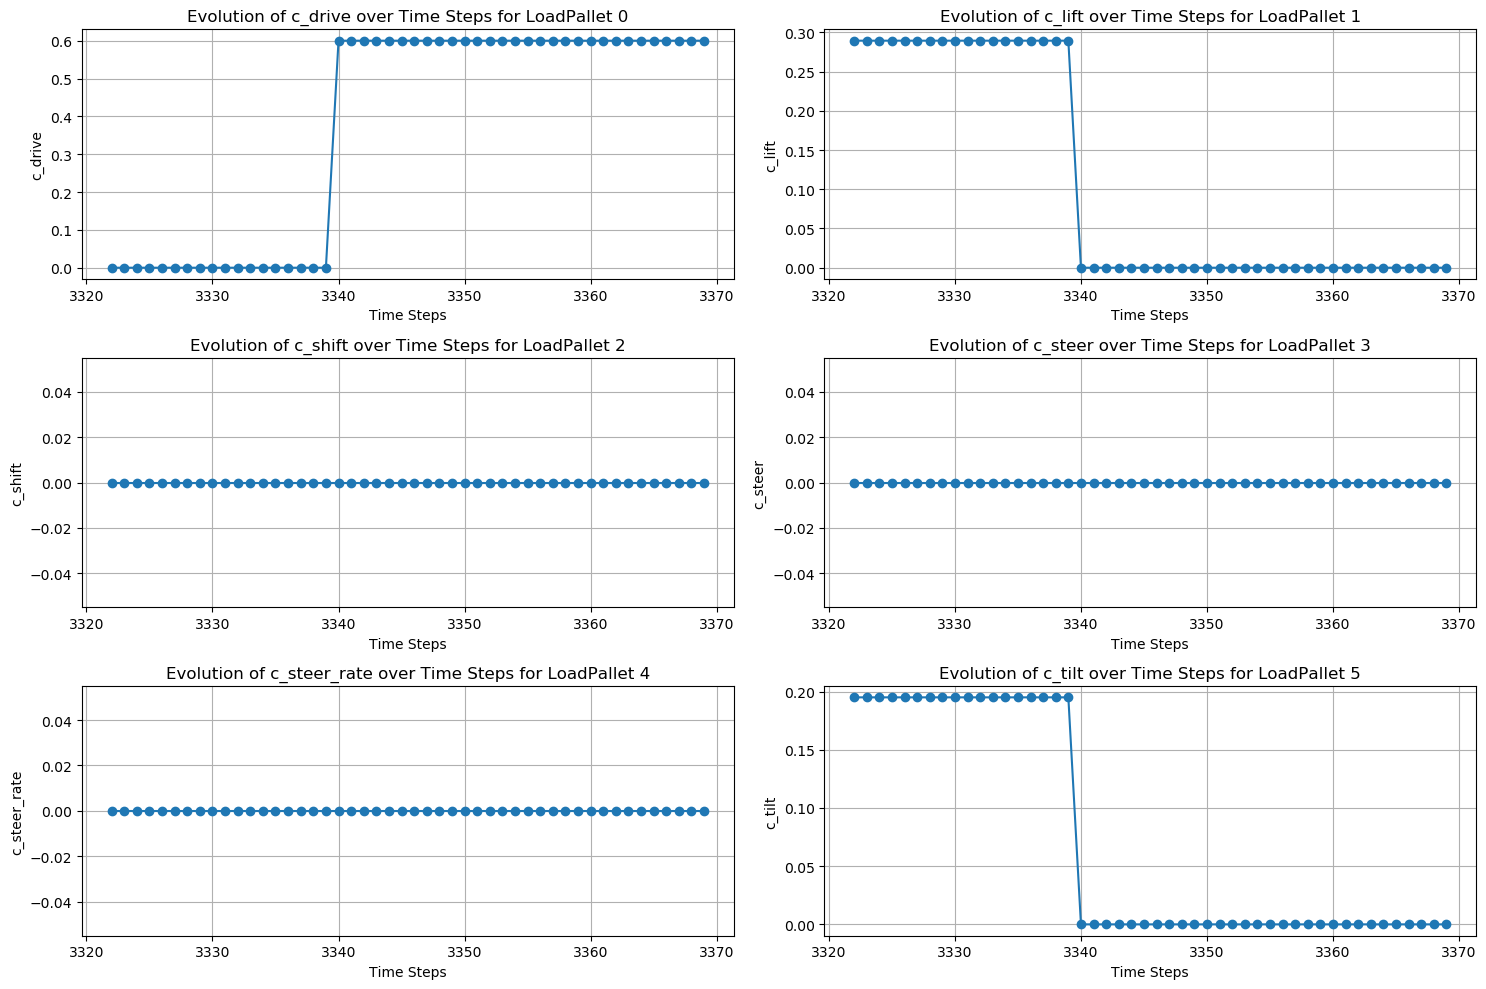

In [10]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

for i, split_df in enumerate(split_dfs_load):
    # Create subplots
    print("\nPrinting info of trajectory LoadPallet ", i)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(split_df.index, split_df[column], marker='o', linestyle='-')
        axes[i].set_title(f'Evolution of {column} over Time Steps for LoadPallet {i}')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel(column)
        axes[i].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()



Printing info of trajectory UnloadPallet  0


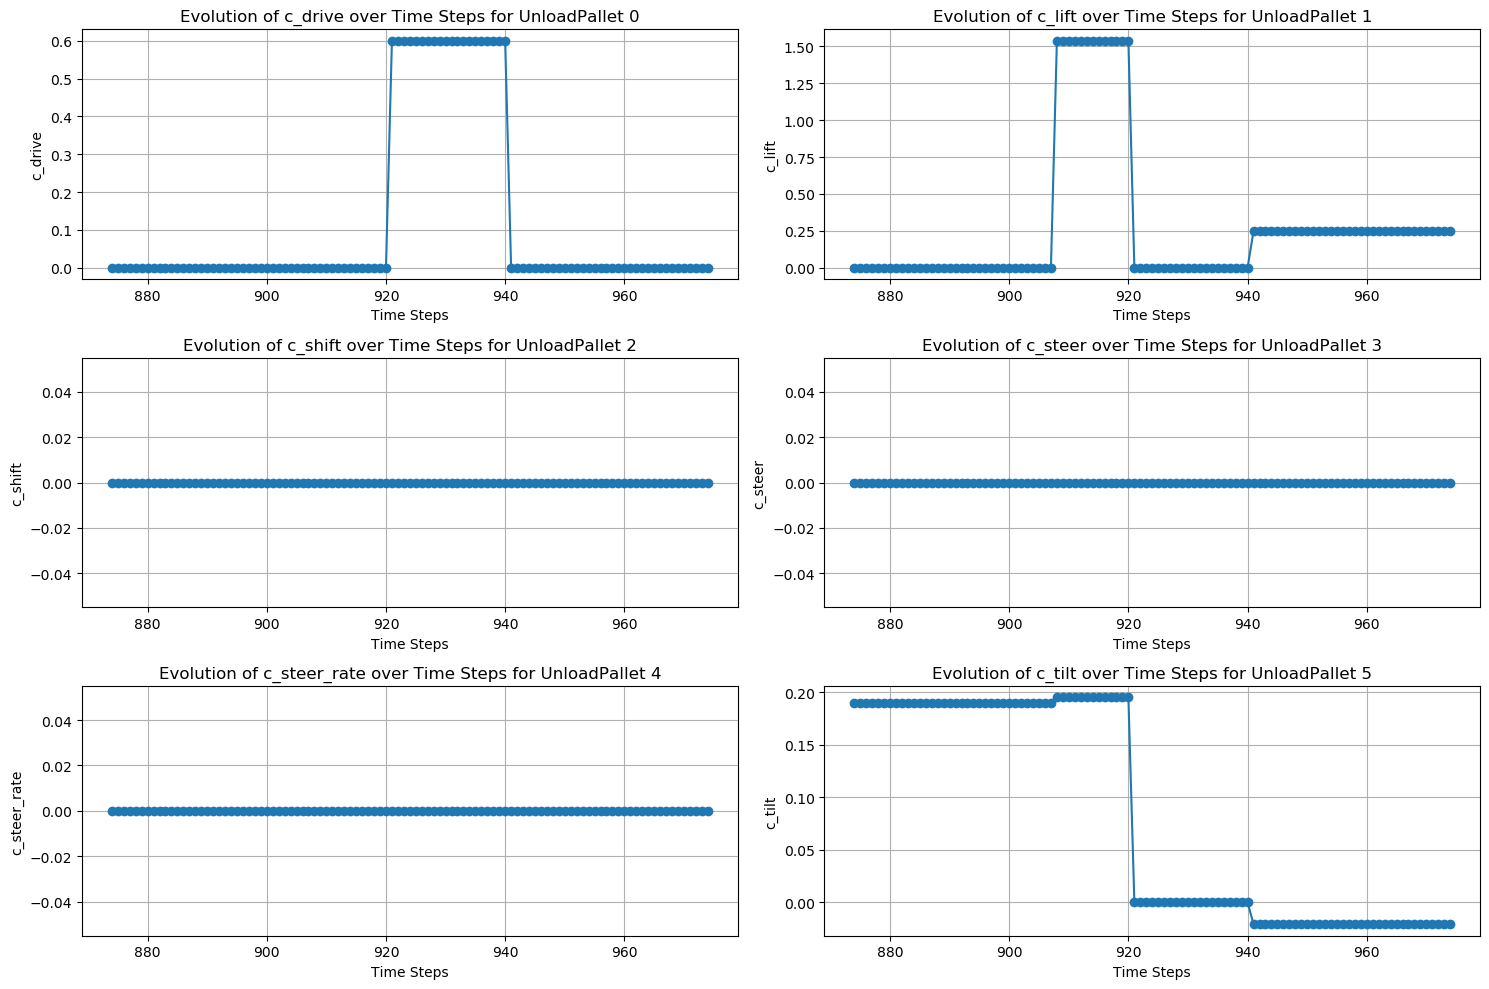


Printing info of trajectory UnloadPallet  1


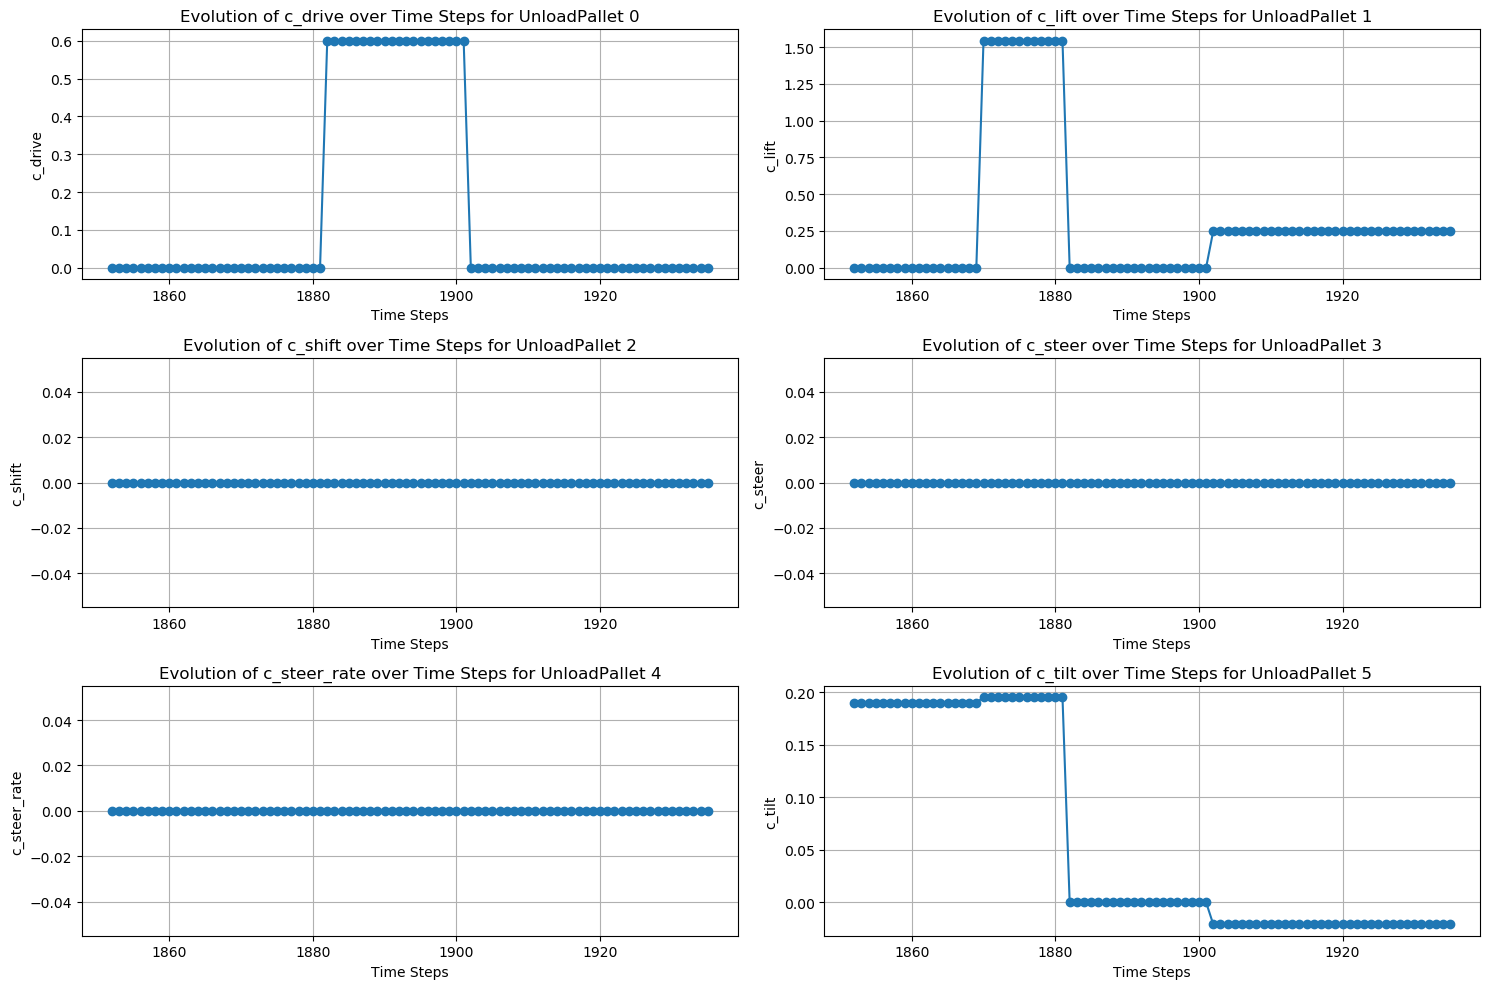


Printing info of trajectory UnloadPallet  2


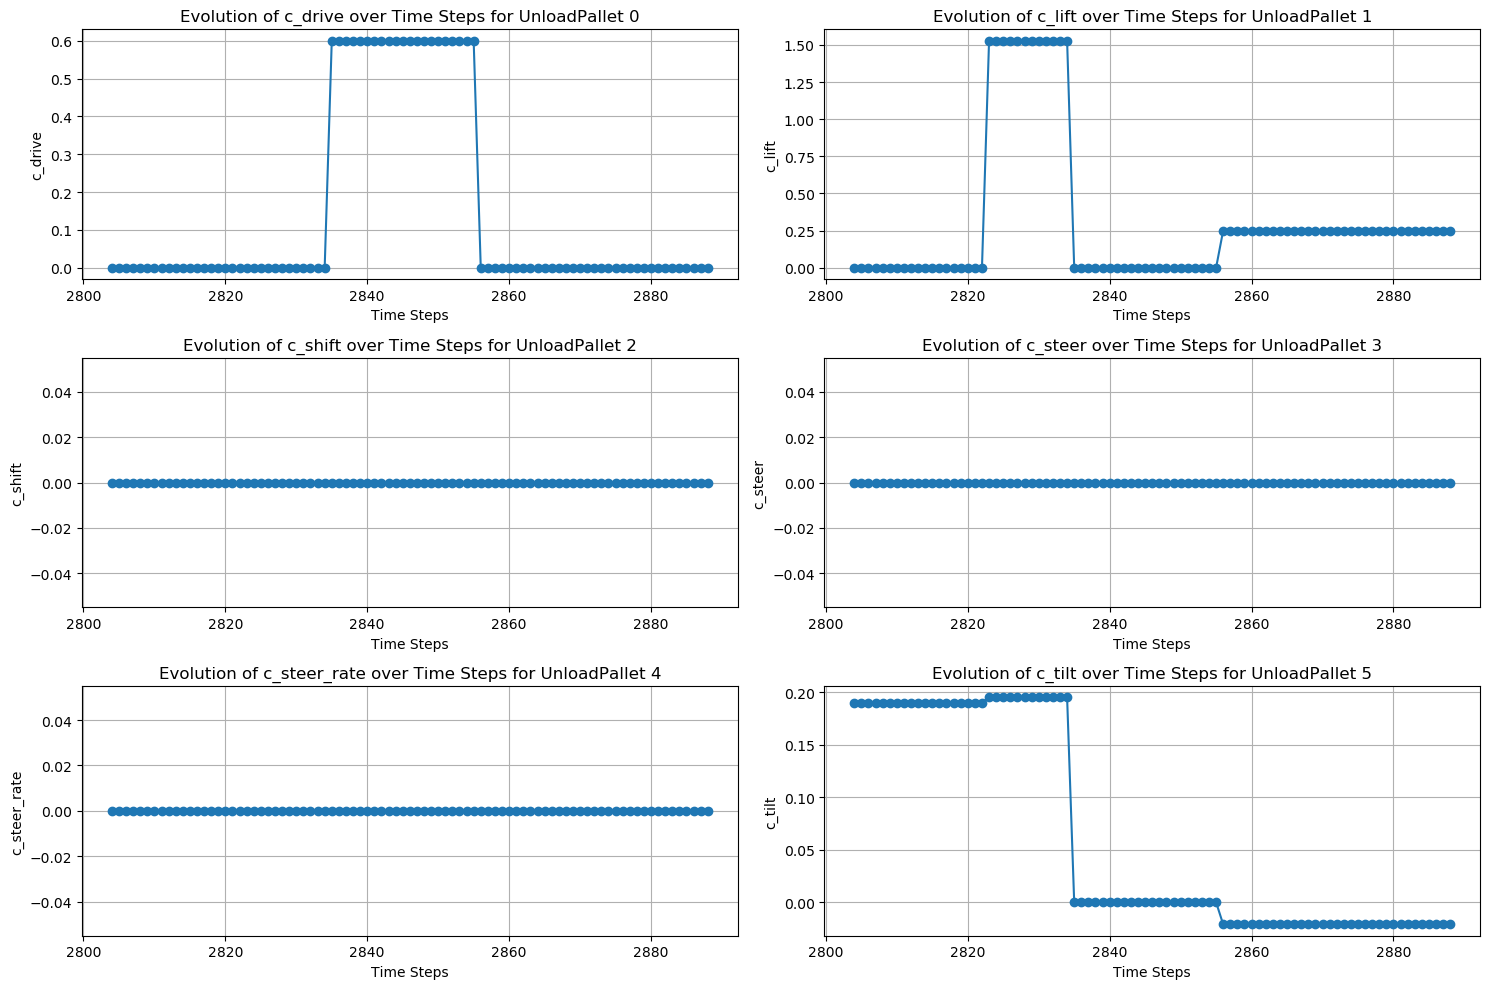


Printing info of trajectory UnloadPallet  3


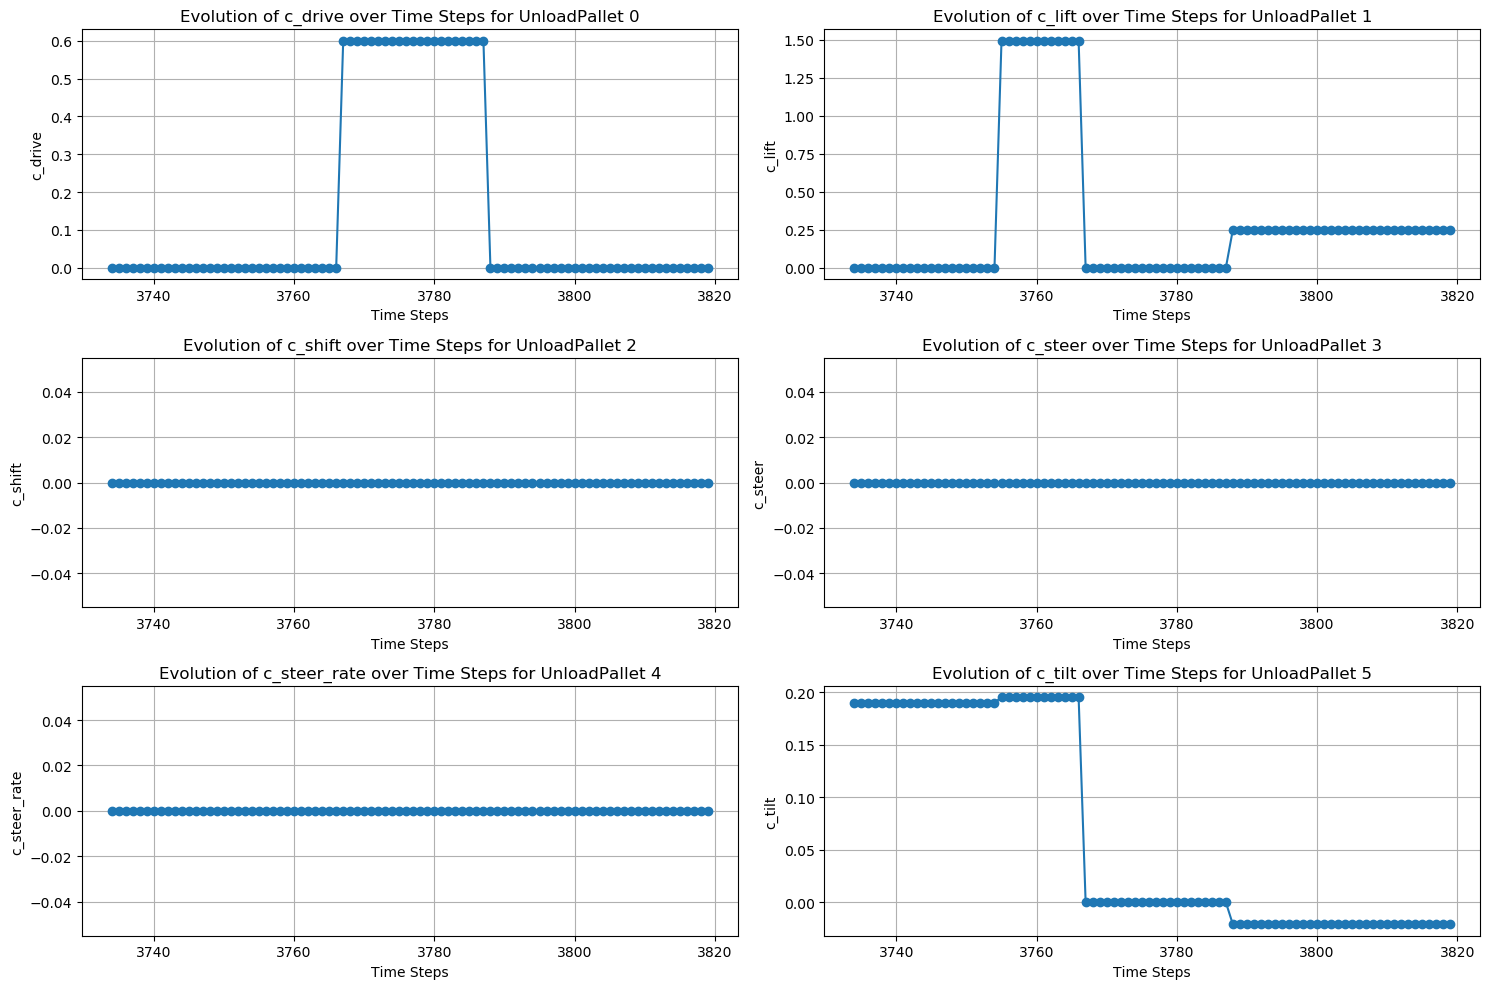

In [11]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

for i, split_df in enumerate(split_dfs_unload):
    # Create subplots
    print("\nPrinting info of trajectory UnloadPallet ", i)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(split_df.index, split_df[column], marker='o', linestyle='-')
        axes[i].set_title(f'Evolution of {column} over Time Steps for UnloadPallet {i}')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel(column)
        axes[i].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()



Printing info of trajectory GoToPallet  0


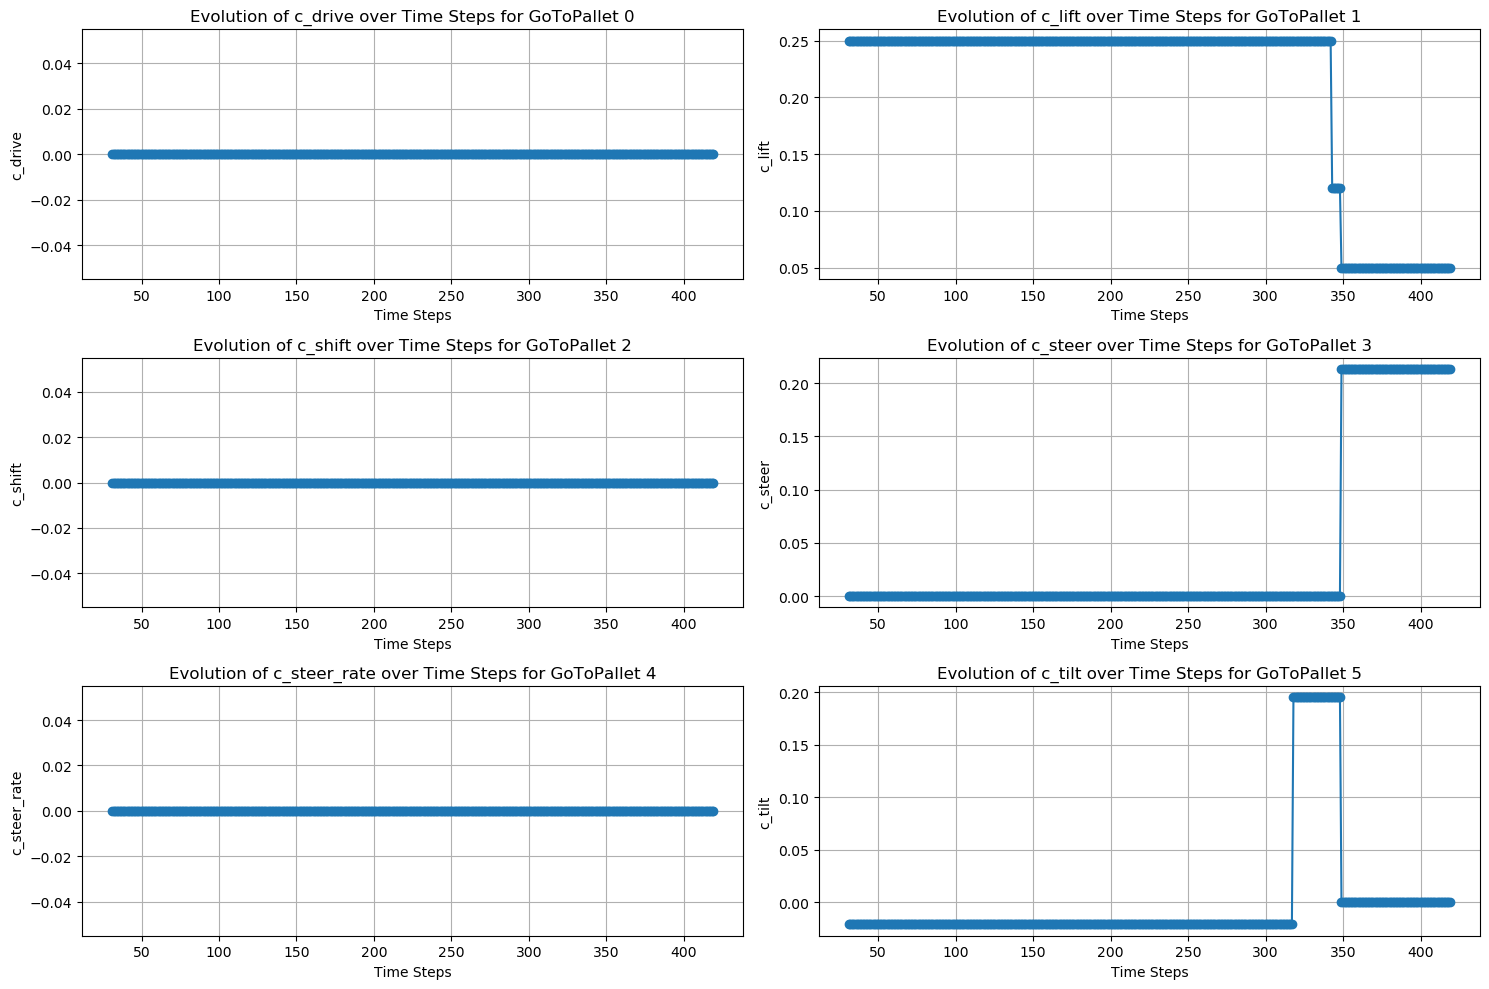


Printing info of trajectory GoToPallet  1


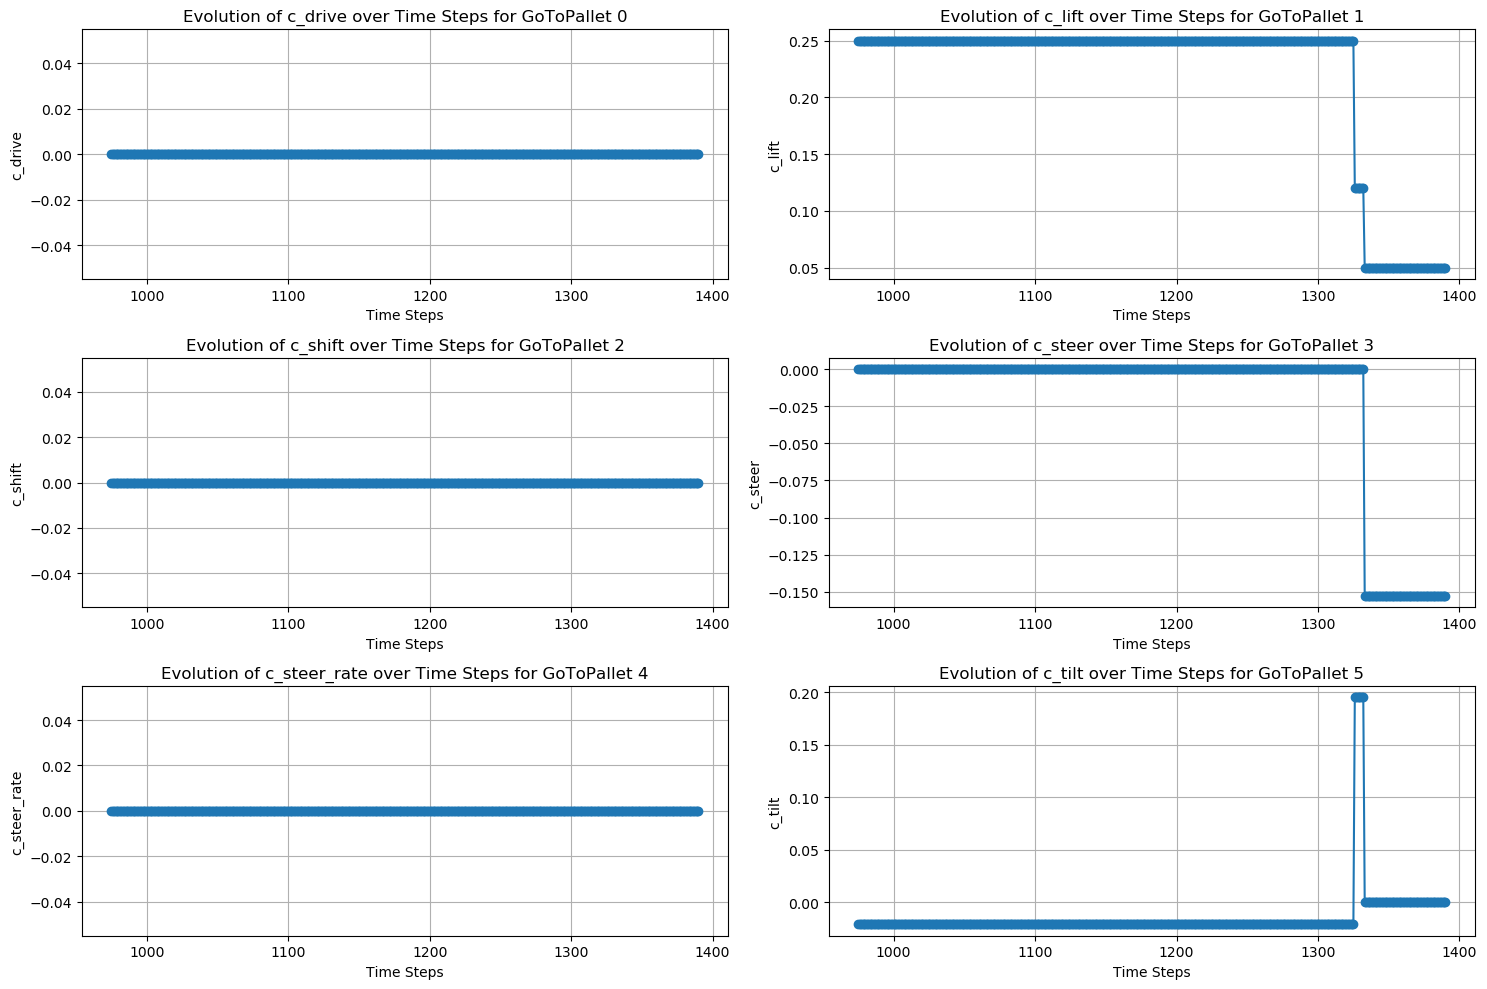


Printing info of trajectory GoToPallet  2


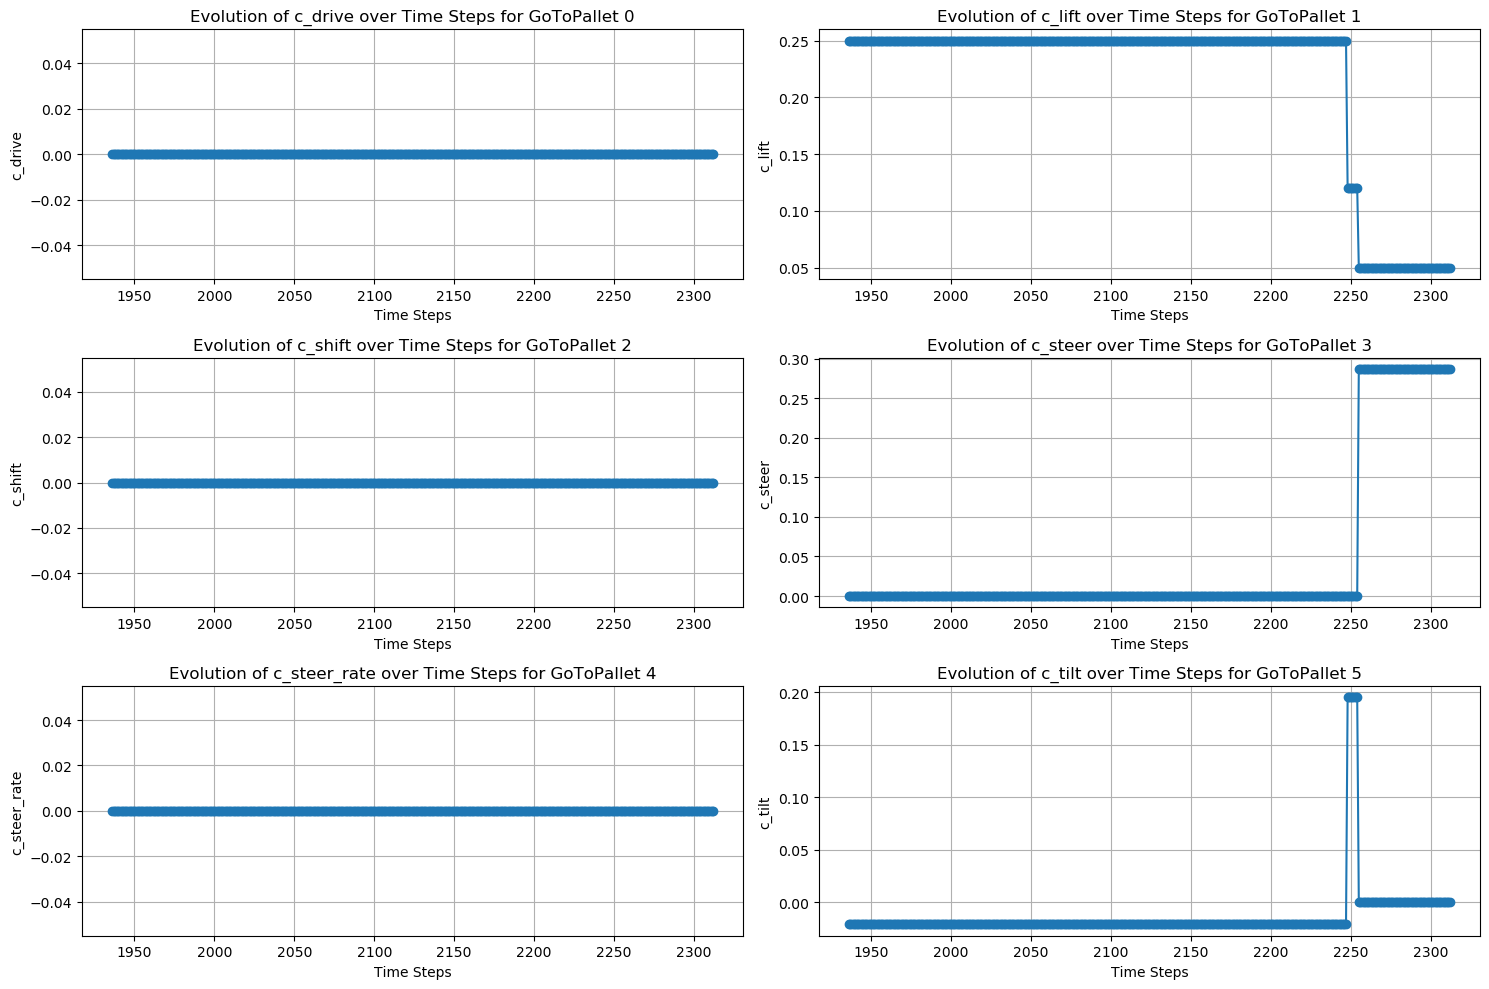


Printing info of trajectory GoToPallet  3


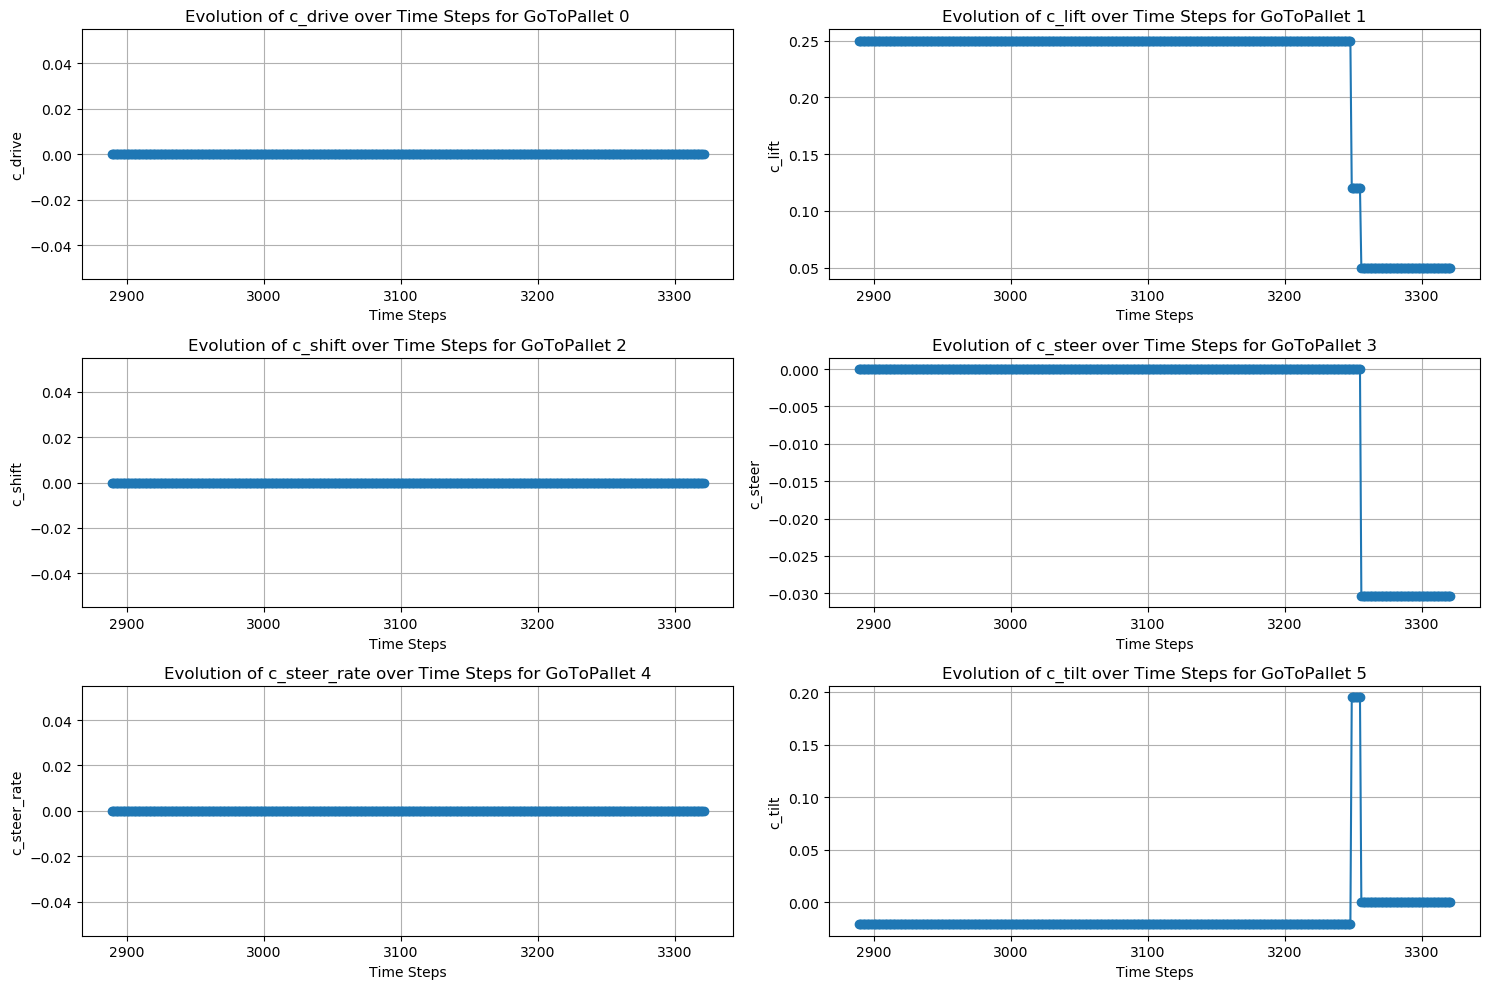

In [12]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

for i, split_df in enumerate(split_dfs_gotopallet):
    # Create subplots
    print("\nPrinting info of trajectory GoToPallet ", i)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(split_df.index, split_df[column], marker='o', linestyle='-')
        axes[i].set_title(f'Evolution of {column} over Time Steps for GoToPallet {i}')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel(column)
        axes[i].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


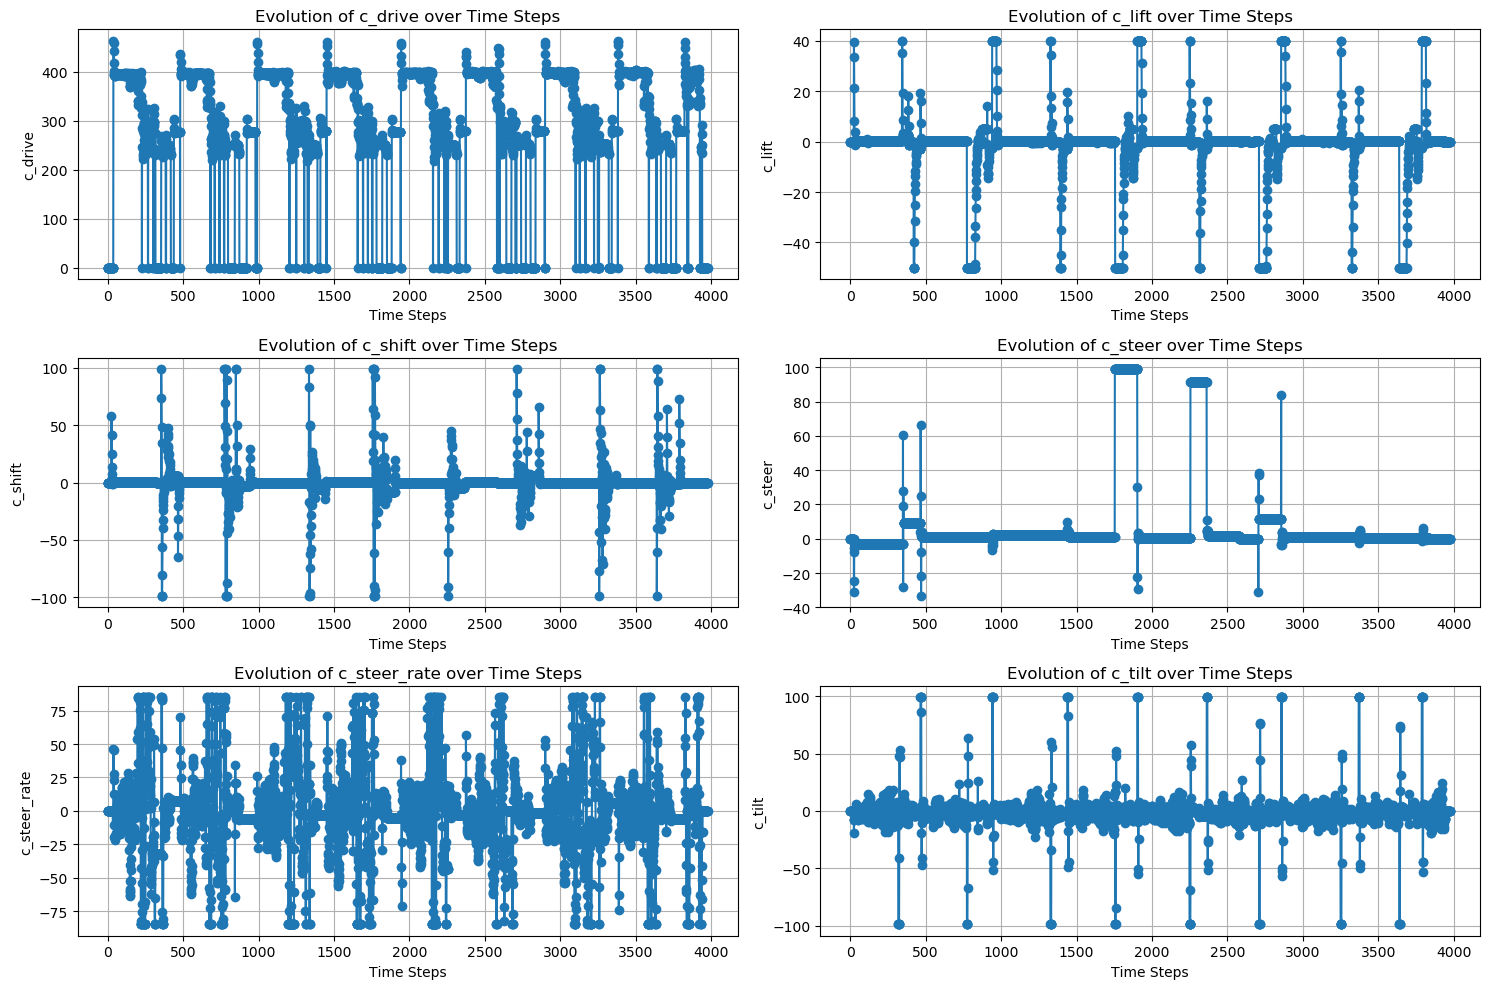

In [68]:
columns_to_plot = ['c_drive', 'c_lift', 'c_shift', 'c_steer', 'c_steer_rate', 'c_tilt']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot each column in its respective subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df.index, df[column], marker='o', linestyle='-')
    axes[i].set_title(f'Evolution of {column} over Time Steps')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
filtered_df_load.head()

,Date,Time,MSec from start,Mission,Emergency Stop,Operating Mode,Dead mans switch,Machine Hours,GPSLat,GPSLong,...,y_slot_3,planned_object_id_3,slot_id_4,state_slot_4,x_slot_4,y_slot_4,planned_object_id_4,data_error,param_error,is_connected
420,2024-04-25,11:02:52.656016,84000.710487,LoadPallet,False,autonomous,True,251.610413,47.977408,16.510766,...,-23.650103,NaN,loading_platform_frame_3,empty,32.190498,-24.290489,NaN,0,0,1
421,2024-04-25,11:02:52.855965,84200.659513,LoadPallet,False,autonomous,True,251.610458,47.977408,16.510766,...,-23.650103,NaN,loading_platform_frame_3,empty,32.190498,-24.290489,NaN,0,0,1
422,2024-04-25,11:02:53.055341,84400.035858,LoadPallet,False,autonomous,True,251.610519,47.977408,16.510766,...,-23.650103,NaN,loading_platform_frame_3,empty,32.190498,-24.290489,NaN,0,0,1
423,2024-04-25,11:02:53.255308,84600.002289,LoadPallet,False,autonomous,True,251.610580,47.977408,16.510766,...,-23.650103,NaN,loading_platform_frame_3,empty,32.190498,-24.290489,NaN,0,0,1
424,2024-04-25,11:02:53.455321,84800.014973,LoadPallet,False,autonomous,True,251.610626,47.977408,16.510766,...,-23.650103,NaN,loading_platform_frame_3,empty,32.190498,-24.290489,NaN,0,0,1


In [72]:
print(filtered_df_load["c_drive"])

420       0.025391
421       0.025391
422       0.025391
423       0.025391
424       0.025391
           ...    
3365    279.068604
3366    278.912659
3367    278.994293
3368    278.766449
3369    279.133545
Name: c_drive, Length: 191, dtype: float64
